In [5]:
import os
from urllib.request import urlretrieve
from rubiks_cube import RubiksCube, RubiksAction
from adi import ADI 
from mcts import MCTS
%matplotlib qt

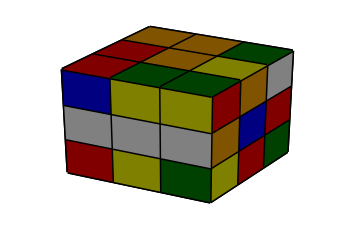

In [12]:
shuffle_depth = 20

rubiks = RubiksCube(shuffle=False)
rubiks.shuffle_cube(n=shuffle_depth)

rubiks.render()

In [11]:
dim, k, l, iteration = 3, 25, 400, 340

model_url = 'https://github.com/Dalkio/RL_rubiks/releases/download/1.0/model_{0}x{0}_k{1}_l{2}_iter{3}'.format(
    dim, k, l, iteration
)
os.makedirs('data', exist_ok=True)
for extension in ['.json', '.h5']:
    urlretrieve(model_url + extension, os.path.join('data', model_url.split("/")[-1]) + extension)

In [2]:
adi_model = ADI(create_dataset=False, save_dataset=False)
adi_model.load_trained_model('model_{0}x{0}_k{1}_l{2}_iter{3}'.format(dim, k, l, iteration), iteration)

In [11]:
max_iterations = 300

mcts_solver = MCTS(adi_model)
path = mcts_solver.search(rubiks, max_iterations=max_iterations)

if path:
    print('Cube resolved!')
    for action_idx in path:
        rubiks.step(RubiksAction(action=rubiks.actions[action_idx]))
else:
    print('No solution found! :\'(')
    pass

Cube resolved!


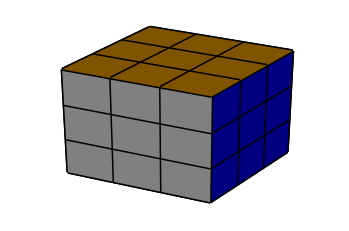

In [14]:
rubiks.render()